Random Seeding & Enable Determinism to produce replicable results

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

2024-06-26 13:30:00.049006: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 13:30:00.065649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 13:30:00.065662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 13:30:00.066229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 13:30:00.069366: I tensorflow/core/platform/cpu_feature_guar

Importing libraries and modules

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from keras import layers
from pickle import dump

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(tf.__version__)

2.15.0


Load Dataset

In [3]:
features = ["Neck_right-ward_rotation", "LeftElbow_flexion", "RightElbow_flexion", "LeftKnee_flexion", "RightKnee_flexion", "Thorax_extension", "Thorax_lateral_flexion_rotation"]

In [4]:
train_df = pd.read_csv("/home/RUS_CIP/st179677/project/dataset/5 users/60 FPS - clipped/train.csv")
train_labels = train_df["label"]
train_df = train_df[features]

test_df = pd.read_csv("/home/RUS_CIP/st179677/project/dataset/5 users/60 FPS - clipped/test.csv")
test_labels = test_df["label"]
test_df = test_df[features]

train_df

,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,3.549500,3.371736,6.512918,-0.027976,-9.991233,4.250910,1.359221
1,3.535295,3.384024,6.488364,-0.044235,-10.002430,4.234431,1.358340
2,3.520810,3.393730,6.458497,0.000000,-10.025780,4.219234,1.354973
3,3.515579,3.396440,6.445703,0.000000,-10.041360,4.213845,1.352576
4,3.502299,3.399379,6.424006,0.000000,-10.073370,4.209521,1.349454
...,...,...,...,...,...,...,...
37822,-7.042944,19.845620,2.196420,-25.599820,-15.201360,-5.448487,-4.488398
37823,-7.032102,16.464140,1.834937,-25.603310,-14.568030,-5.302969,-4.015072
37824,-6.960776,10.478350,1.033061,-25.585250,-13.215460,-5.018915,-3.140173
37825,-6.853118,5.816689,-0.027976,-25.631230,-11.444740,-4.787452,-2.385553


In [5]:
test_df

,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,2.765412,20.814490,30.12619,-8.229175,-13.131230,6.504000,1.627866
1,2.636559,21.221590,30.88624,-8.038465,-12.906960,6.463595,1.625073
2,2.508973,21.468310,31.50667,-7.943271,-12.765620,6.425258,1.627737
3,2.449764,21.518730,31.76913,-7.920478,-12.722180,6.405085,1.628181
4,2.332213,21.480970,32.18284,-7.882718,-12.654570,6.368090,1.629171
...,...,...,...,...,...,...,...
9577,4.687718,6.453425,10.98043,-22.254830,-5.575275,2.471084,-1.660658
9578,4.459927,7.567453,11.02977,-22.112130,-4.936616,2.437349,-1.303692
9579,4.323501,8.213532,11.07498,-22.051290,-4.675375,2.496616,-1.127473
9580,4.081591,9.373895,11.12502,-21.856070,-4.978978,2.689409,-0.686530


In [6]:
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns, index=train_df.index)

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))
test_df = pd.DataFrame(scaler.transform(test_df), columns = test_df.columns, index=test_df.index)

train_df

,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,0.017396,-0.930361,-0.716564,0.822575,0.576255,0.610628,0.473599
1,0.016010,-0.929954,-0.717281,0.822009,0.575842,0.609845,0.473469
2,0.014597,-0.929633,-0.718154,0.823549,0.574979,0.609123,0.472970
3,0.014087,-0.929543,-0.718527,0.823549,0.574404,0.608867,0.472616
4,0.012791,-0.929445,-0.719161,0.823549,0.573222,0.608661,0.472154
...,...,...,...,...,...,...,...
37822,-1.015844,-0.384439,-0.842628,-0.067633,0.383842,0.149849,-0.391882
37823,-1.014786,-0.496497,-0.853185,-0.067755,0.407231,0.156762,-0.321827
37824,-1.007829,-0.694858,-0.876604,-0.067126,0.457183,0.170257,-0.192337
37825,-0.997327,-0.849339,-0.907591,-0.068727,0.522576,0.181252,-0.080649


In [7]:
# Create 51 empty lists with names X0 to X50
X0, X1, X2, X3, X4, X5, X6, x0, x1, x2, x3, x4, x5, x6, y_train, y_test = ([] for _ in range(16))

Create Sequences from Dataset

In [8]:
timesteps = 60
step_size = 1  # Adjust this value as needed to control the stride

"""TRAIN DATA"""
# Iterate over the range of rows in df
for i in range(0, train_df.shape[0] - timesteps):
    for j in range(7):  # Loop for column indexing
        globals()[f'X{j}'].append(train_df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, train_labels.shape[0] - timesteps):
    y_train.append(train_labels.iloc[i + timesteps])

"""TEST DATA"""
# Iterate over the range of rows in df
for i in range(0, test_df.shape[0] - timesteps):
    for j in range(7):  # Loop for column indexing
        globals()[f'x{j}'].append(test_df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, test_labels.shape[0] - timesteps):
     y_test.append(test_labels.iloc[i + timesteps])

In [9]:
type(y_train), type(y_test)
len(y_train), len(y_test)

(37767, 9522)

In [10]:
X0, X1, X2, X3, X4, X5, X6, x0, x1, x2, x3, x4, x5, x6, y_train, y_test = np.array(X0), np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6), np.array(x0), np.array(x1),  np.array(x2),  np.array(x3),  np.array(x4),  np.array(x5),  np.array(x6), np.array(y_train), np.array(y_test)

In [11]:
X0.shape, x0.shape

((37767, 60), (9522, 60))

In [12]:
X0.shape

(37767, 60)

In [13]:
X0

array([[ 0.01739563,  0.01601   ,  0.01459707, ...,  0.0108171 ,
         0.00923931,  0.00814652],
       [ 0.01601   ,  0.01459707,  0.01408681, ...,  0.00923931,
         0.00814652,  0.00535985],
       [ 0.01459707,  0.01408681,  0.01279141, ...,  0.00814652,
         0.00535985,  0.00254978],
       ...,
       [ 0.84678727,  0.84285816,  0.81871773, ..., -1.00492814,
        -1.0158439 , -1.01478632],
       [ 0.84285816,  0.81871773,  0.79589318, ..., -1.0158439 ,
        -1.01478632, -1.00782883],
       [ 0.81871773,  0.79589318,  0.73137109, ..., -1.01478632,
        -1.00782883, -0.99732733]])

In [14]:
X_train = np.stack([X0, X1, X2, X3, X4, X5, X6], axis=2)
X_test = np.stack([x0, x1, x2, x3, x4, x5, x6], axis=2)
print(X_train.shape, X_test.shape)

(37767, 60, 7) (9522, 60, 7)


In [15]:
#splitting dataset into train, test and validation


X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2, stratify=y_train)

print("X train :",X_train.shape)
print("y train:", Y_train.shape)
print("X test :", X_test.shape)
print("y test :" ,y_test.shape)
print("X val :" ,X_val.shape)
print("y val :" ,Y_val.shape)

"""CHECK CLASS DISTRIBUTION"""
unique, counts = np.unique(Y_train, return_counts=True)
# unique, counts = np.unique(y_test, return_counts=True)
# unique, counts = np.unique(Y_val, return_counts=True)

dict(zip(unique, counts))


X train : (33990, 60, 7)
y train: (33990,)
X test : (9522, 60, 7)
y test : (9522,)
X val : (3777, 60, 7)
y val : (3777,)


{0: 8716, 1: 6758, 2: 6420, 3: 5906, 4: 6190}

In [16]:
#Transformer Encoder Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [17]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [18]:
input_shape = (60,7)

model = build_model(
    input_shape,
    head_size=16,
    num_heads=1,
    ff_dim=4,
    num_transformer_blocks=1,
    mlp_units=[32],
    mlp_dropout=0.1,
    dropout=0.1,
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60, 7)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 60, 7)                503       ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 60, 7)                0         ['multi_head_attention[0][0]']
                                                                                                  
 layer_normalization (Layer  (None, 60, 7)                14        ['dropout[0][0]']         

2024-06-26 13:30:15.672861: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-06-26 13:30:15.672879: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: ias-1316
2024-06-26 13:30:15.672882: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: ias-1316
2024-06-26 13:30:15.672967: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.183.1
2024-06-26 13:30:15.672976: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.171.4
2024-06-26 13:30:15.672978: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 535.171.4 does not match DSO version 535.183.1 -- cannot find working devices in this configuration


In [19]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)
callbacks = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10, restore_best_weights=True)]

from keras.callbacks import TensorBoard
import time

NAME = "Transformer-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
)

Epoch 1/200
1063/1063 [==============================] - 4s 3ms/step - loss: 1.1142 - accuracy: 0.5781 - val_loss: 0.6000 - val_accuracy: 0.8552
Epoch 2/200
1063/1063 [==============================] - 4s 3ms/step - loss: 0.4370 - accuracy: 0.8811 - val_loss: 0.2696 - val_accuracy: 0.9322
Epoch 3/200
1063/1063 [==============================] - 3s 3ms/step - loss: 0.2583 - accuracy: 0.9336 - val_loss: 0.2056 - val_accuracy: 0.9465
Epoch 4/200
1063/1063 [==============================] - 3s 3ms/step - loss: 0.2098 - accuracy: 0.9485 - val_loss: 0.1814 - val_accuracy: 0.9611
Epoch 5/200
1063/1063 [==============================] - 3s 3ms/step - loss: 0.1828 - accuracy: 0.9555 - val_loss: 0.1699 - val_accuracy: 0.9632
Epoch 6/200
1063/1063 [==============================] - 3s 3ms/step - loss: 0.1688 - accuracy: 0.9604 - val_loss: 0.1657 - val_accuracy: 0.9613
Epoch 7/200
1063/1063 [==============================] - 3s 3ms/step - loss: 0.1580 - accuracy: 0.9628 - val_loss: 0.1489 - val_ac

In [20]:
model.evaluate(X_test, y_test, verbose=1)

298/298 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.9390


[0.2563167214393616, 0.9389833807945251]

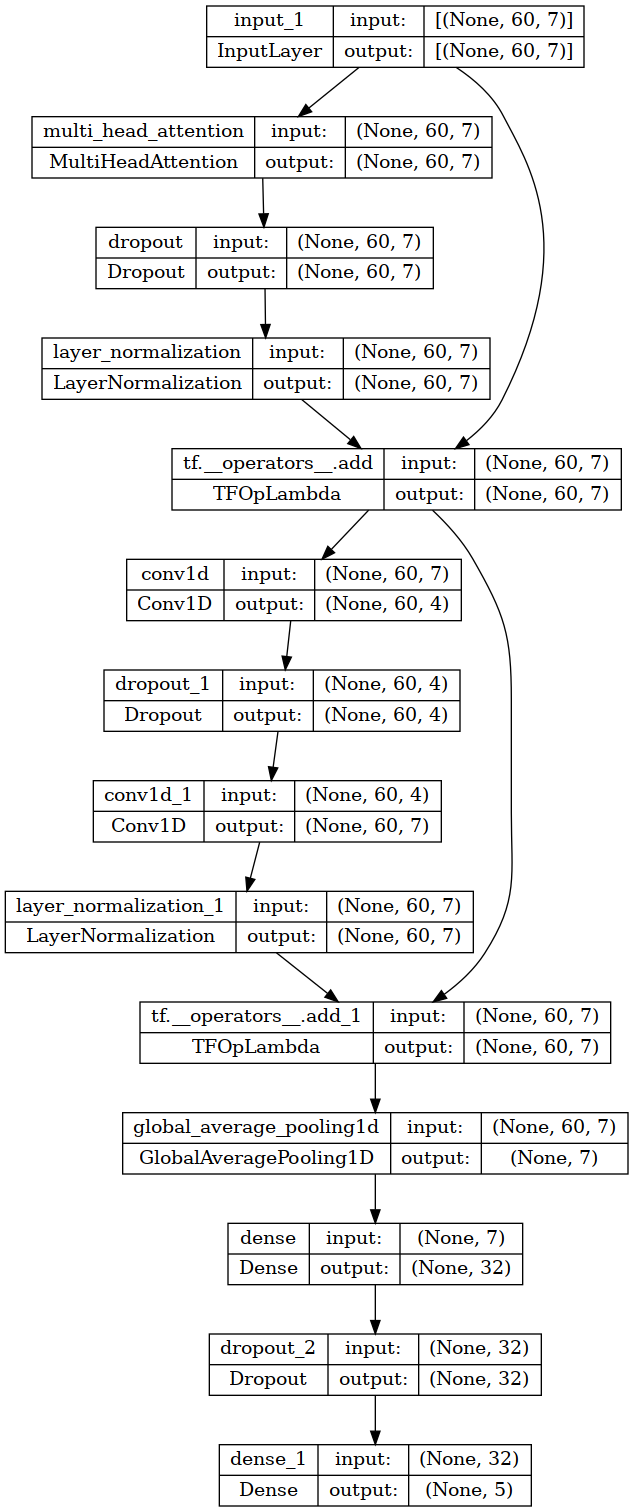

In [21]:
from keras.utils import plot_model
plot_model(model,show_shapes= True, show_layer_names= True, to_file='/home/RUS_CIP/st179677/project/model/Transformer.png')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


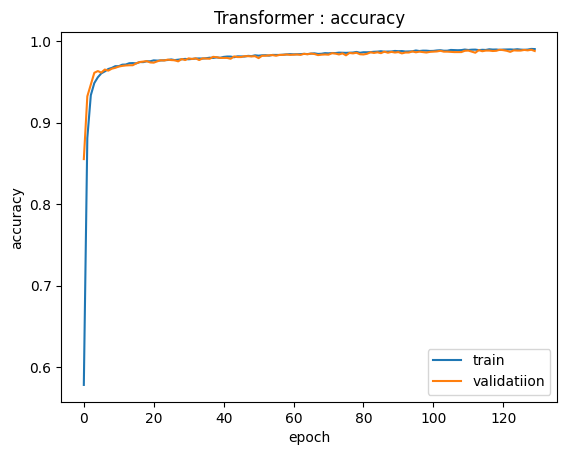

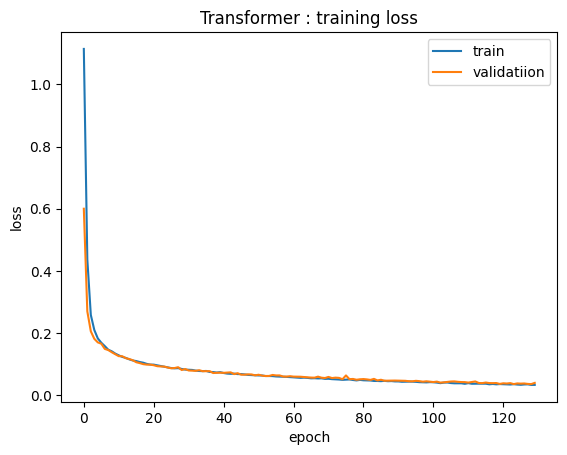

In [22]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Transformer : accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Transformer : training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper right')
plt.show()

In [23]:
#predicting on test datset
from keras.models import load_model
from sklearn.metrics import accuracy_score
# model = load_model(model_filepath)
start_time = time.time()
classify_x=model.predict(X_test) 
end_time = time.time() - start_time
print(f"Inference time = {end_time}")
# print(classify_x)
classes_x=np.argmax(classify_x,axis=1)
# y_test= np.argmax(y_test,axis=1)
print(classes_x)
accuracy=accuracy_score(y_test, classes_x)
accuracy

298/298 [==============================] - 0s 1ms/step
Inference time = 0.5272402763366699
[0 0 0 ... 4 4 4]


0.938983406847301

Classification Metrics

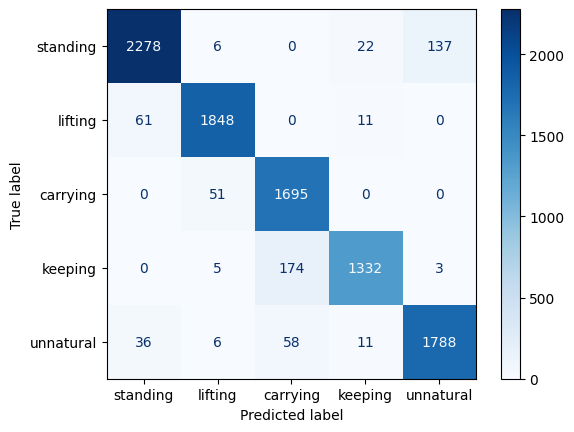

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2443
           1       0.96      0.96      0.96      1920
           2       0.88      0.97      0.92      1746
           3       0.97      0.88      0.92      1514
           4       0.93      0.94      0.93      1899

    accuracy                           0.94      9522
   macro avg       0.94      0.94      0.94      9522
weighted avg       0.94      0.94      0.94      9522



In [24]:
labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

cm = confusion_matrix(y_test, classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, classes_x))

Save Model File

In [25]:
# model_filepath=f'/home/RUS_CIP/st179677/project/model/{round(accuracy*100,2)}_Transformer.h5'

# model.save(model_filepath)